<>:27: SyntaxWarning: invalid escape sequence '\m'
<>:27: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7849/4131512656.py:27: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Conjunto de dados em $\mathbb{R}^2$ para KNN')


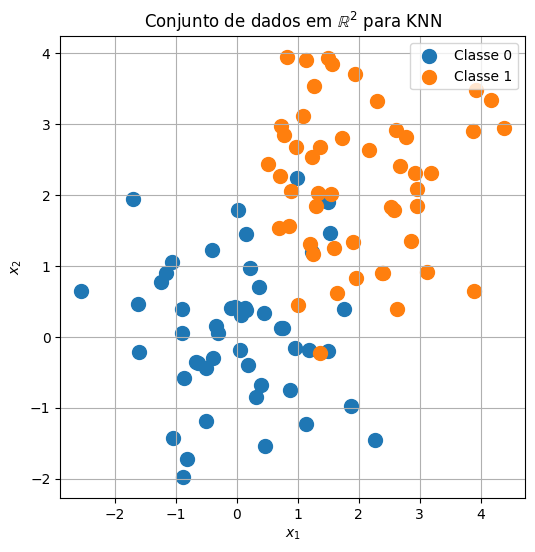

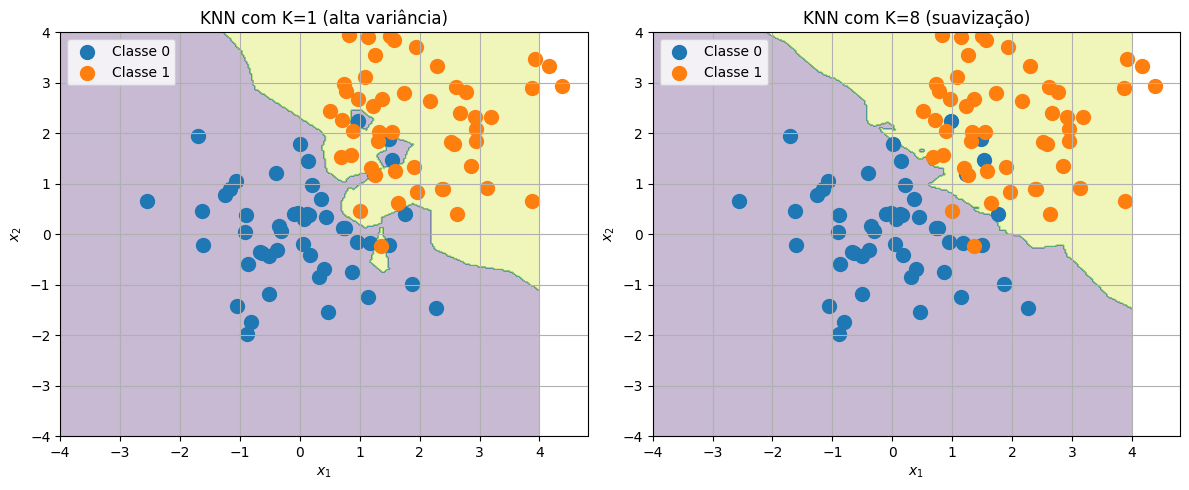

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Gerar dados manualmente (não tão estruturados)
np.random.seed(0)

n = 50

# Classe A: perto de (0, 0)
X_A = np.random.randn(n, 2) * 1 + np.array([0, 0])

# Classe B: perto de (2, 2)
X_B = np.random.randn(n, 2) * 1 + np.array([2, 2])

# Concatenar
X = np.vstack((X_A, X_B))
y = np.array([0]*n + [1]*n)   # Usar labels como números, não strings!

# Plotar os dados
plt.figure(figsize=(6,6))
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Classe {label}', s=100)

plt.legend()
plt.title('Conjunto de dados em $\mathbb{R}^2$ para KNN')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
# plt.xlim(-2, 4)
# plt.ylim(-2, 4)
plt.show()

# Agora a malha
xx, yy = np.meshgrid(np.linspace(-4, 4, 300),
                     np.linspace(-4, 4, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# K pequeno (K=1)
knn_small = KNeighborsClassifier(n_neighbors=1)
knn_small.fit(X, y)
Z_small = knn_small.predict(grid)
Z_small = Z_small.reshape(xx.shape)  # Muito importante!

# K grande (K=8)
knn_large = KNeighborsClassifier(n_neighbors=8)
knn_large.fit(X, y)
Z_large = knn_large.predict(grid)
Z_large = Z_large.reshape(xx.shape)  # Muito importante!

# Plot
plt.figure(figsize=(12,5))

# K=1
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z_small, alpha=0.3)
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Classe {label}', s=100)
plt.title('KNN com K=1 (alta variância)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

# K=8
plt.subplot(1,2,2)
plt.contourf(xx, yy, Z_large, alpha=0.3)
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Classe {label}', s=100)
plt.title('KNN com K=8 (suavização)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Tamanhos: treino=120, validação=40, teste=40


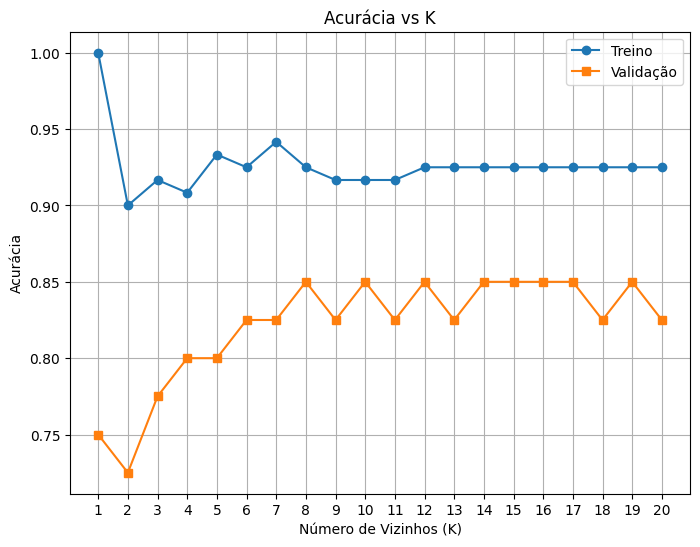

Melhor K encontrado (validação): 8
Acurácia no conjunto de teste com K=8: 0.925


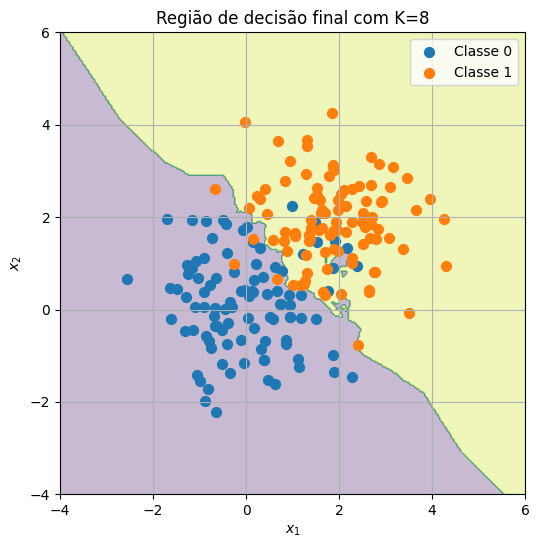

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Gerar dados
np.random.seed(0)

n = 100  # Aumentar o número de pontos!

# Classe A: perto de (0, 0)
X_A = np.random.randn(n, 2) * 1 + np.array([0, 0])

# Classe B: perto de (2, 2)
X_B = np.random.randn(n, 2) * 1 + np.array([2, 2])

# Concatenar
X = np.vstack((X_A, X_B))
y = np.array([0]*n + [1]*n)

# Separar em treino, validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)
# (0.6 treino, 0.2 validação, 0.2 teste)

print(f'Tamanhos: treino={len(y_train)}, validação={len(y_val)}, teste={len(y_test)}')

# Testar vários valores de K
k_values = range(1, 21)
train_acc = []
val_acc = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Acurácia treino e validação
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    val_acc.append(accuracy_score(y_val, model.predict(X_val)))

# Plotar curva treino/validação
plt.figure(figsize=(8,6))
plt.plot(k_values, train_acc, marker='o', label='Treino')
plt.plot(k_values, val_acc, marker='s', label='Validação')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.title('Acurácia vs K')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Melhor K (aquele que maximizou a validação)
best_k = k_values[np.argmax(val_acc)]
print(f'Melhor K encontrado (validação): {best_k}')

# Avaliar no conjunto de teste
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train_val, y_train_val)  # Treina em treino+validação agora
test_acc = accuracy_score(y_test, final_model.predict(X_test))
print(f'Acurácia no conjunto de teste com K={best_k}: {test_acc:.3f}')

# Visualizar a fronteira de decisão final
xx, yy = np.meshgrid(np.linspace(-4, 6, 300),
                     np.linspace(-4, 6, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = final_model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
plt.contourf(xx, yy, Z, alpha=0.3)
for label in np.unique(y):
    idx = np.where(y == label)
    plt.scatter(X[idx, 0], X[idx, 1], label=f'Classe {label}', s=50)
plt.title(f'Região de decisão final com K={best_k}')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-4, 6)
plt.ylim(-4, 6)
plt.legend()
plt.grid(True)
plt.show()
